<h1 align="center">Bike Sharing Assignment</h1> 

### Supress Warnings and Import Required Libraries 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [5]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Reading and Understanding the data

In [6]:
boombikes = pd.read_csv('day.csv')

In [7]:
# Check the datset

boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Inspect various aspects of boombikes dataframe

In [8]:
# Check shape of the dataframe

boombikes.shape

(730, 16)

In [9]:
# Check datatypes 

boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
# Check null values in the dataset

boombikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Observation:
<pre>
No null values in the dataset.

In [11]:
# Check statistical summary of the data

boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [12]:
# Rename some columns for better understanding

boombikes.rename(columns={'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace=True)

# Check renamed columns in dataframe

boombikes.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
# Map required variables

boombikes['season'] = boombikes.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
boombikes['month'] = boombikes.month.map({1:'jan', 2:'feb', 3:'mar', 4:'april', 5:'may', 6:'june', 7:'july', 
                                        8:'aug', 9:'sept', 10:'oct', 11:'nov', 12:'dec'})
boombikes['weekday'] = boombikes.weekday.map({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'})
boombikes['weathersit'] = boombikes.weathersit.map({1:'clear', 2:'mist_cloudy', 3:'light_rain/snow', 4:'heavy_rain/snow+fog'})

# Check mapped variables

boombikes.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,jan,0,mon,1,mist_cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,tue,1,mist_cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
# Check data types of newly mapped variables

boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   year        730 non-null    int64  
 4   month       730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  humidity    730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  count       730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


In [15]:
# Drop unnecessary variables

boombikes = boombikes.drop(['instant','dteday','casual','registered'], axis=1)

# Check updated dataframe

boombikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,jan,0,mon,1,mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


### Visualising the data

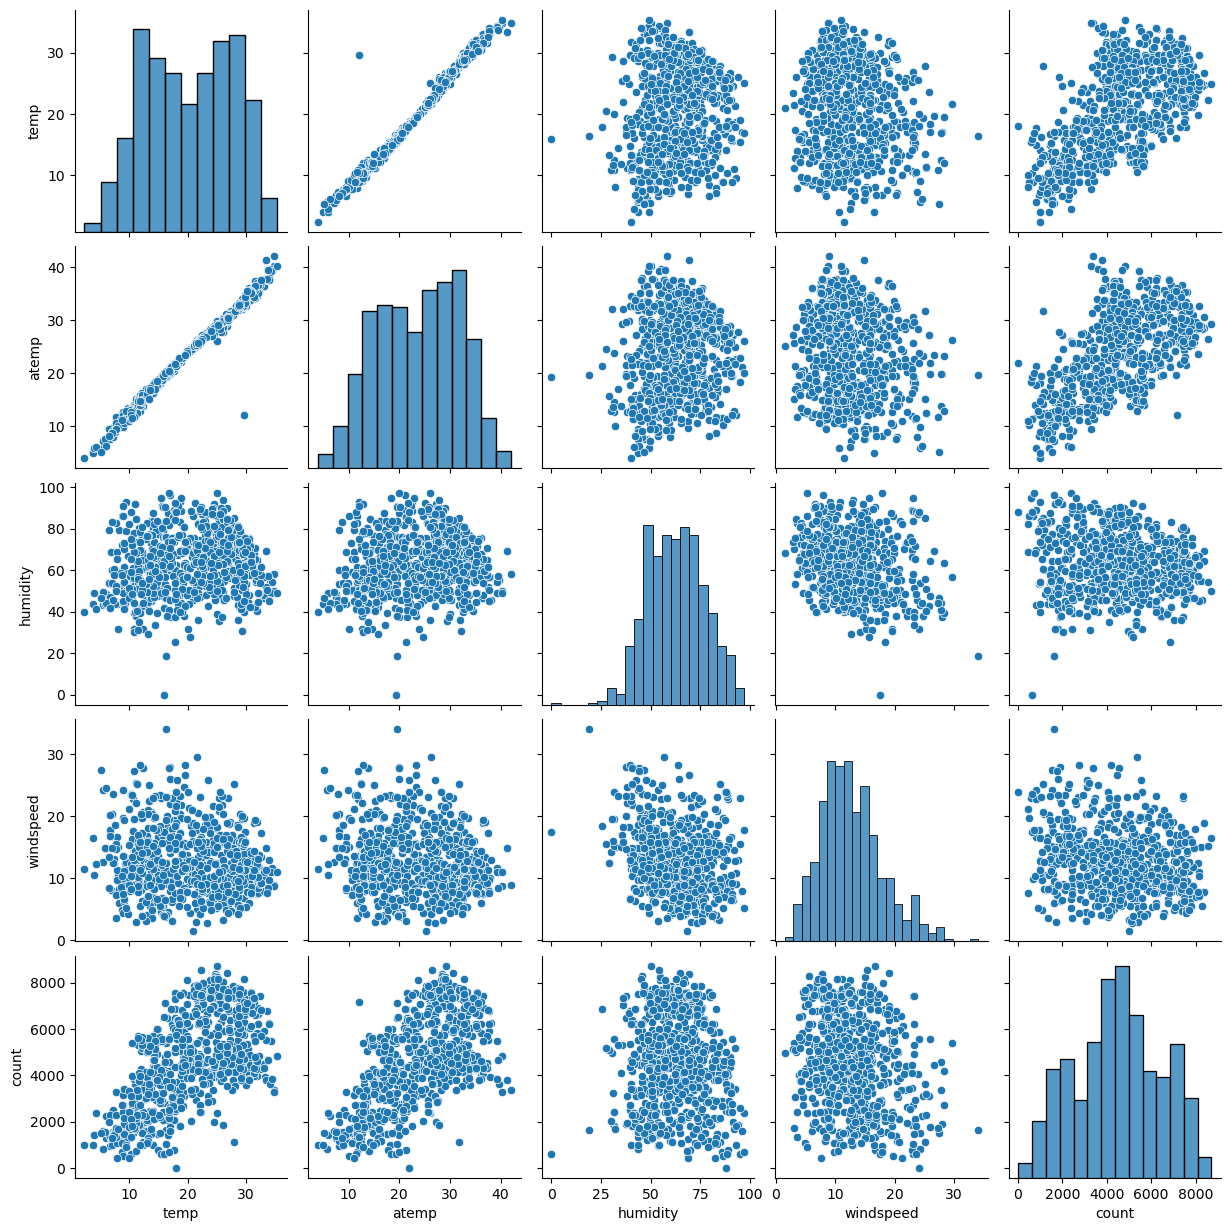

In [16]:
# Visualising Numeric Variables

sns.pairplot(boombikes, vars=['temp','atemp','humidity','windspeed','count'])
plt.show()

### Observation:
<pre>

Based on the analysis of the plots, it appears that temperature is positively correlated with the variable    "count", indicating that bike rentals tend to increase as the temperature rises.

This suggests that people are more likely to rent bikes on warmer days however, correlation does not imply  causation. While there seems to be a relationship between temperature and bike rentals, other factors could  also be influencing the "count" variable. 

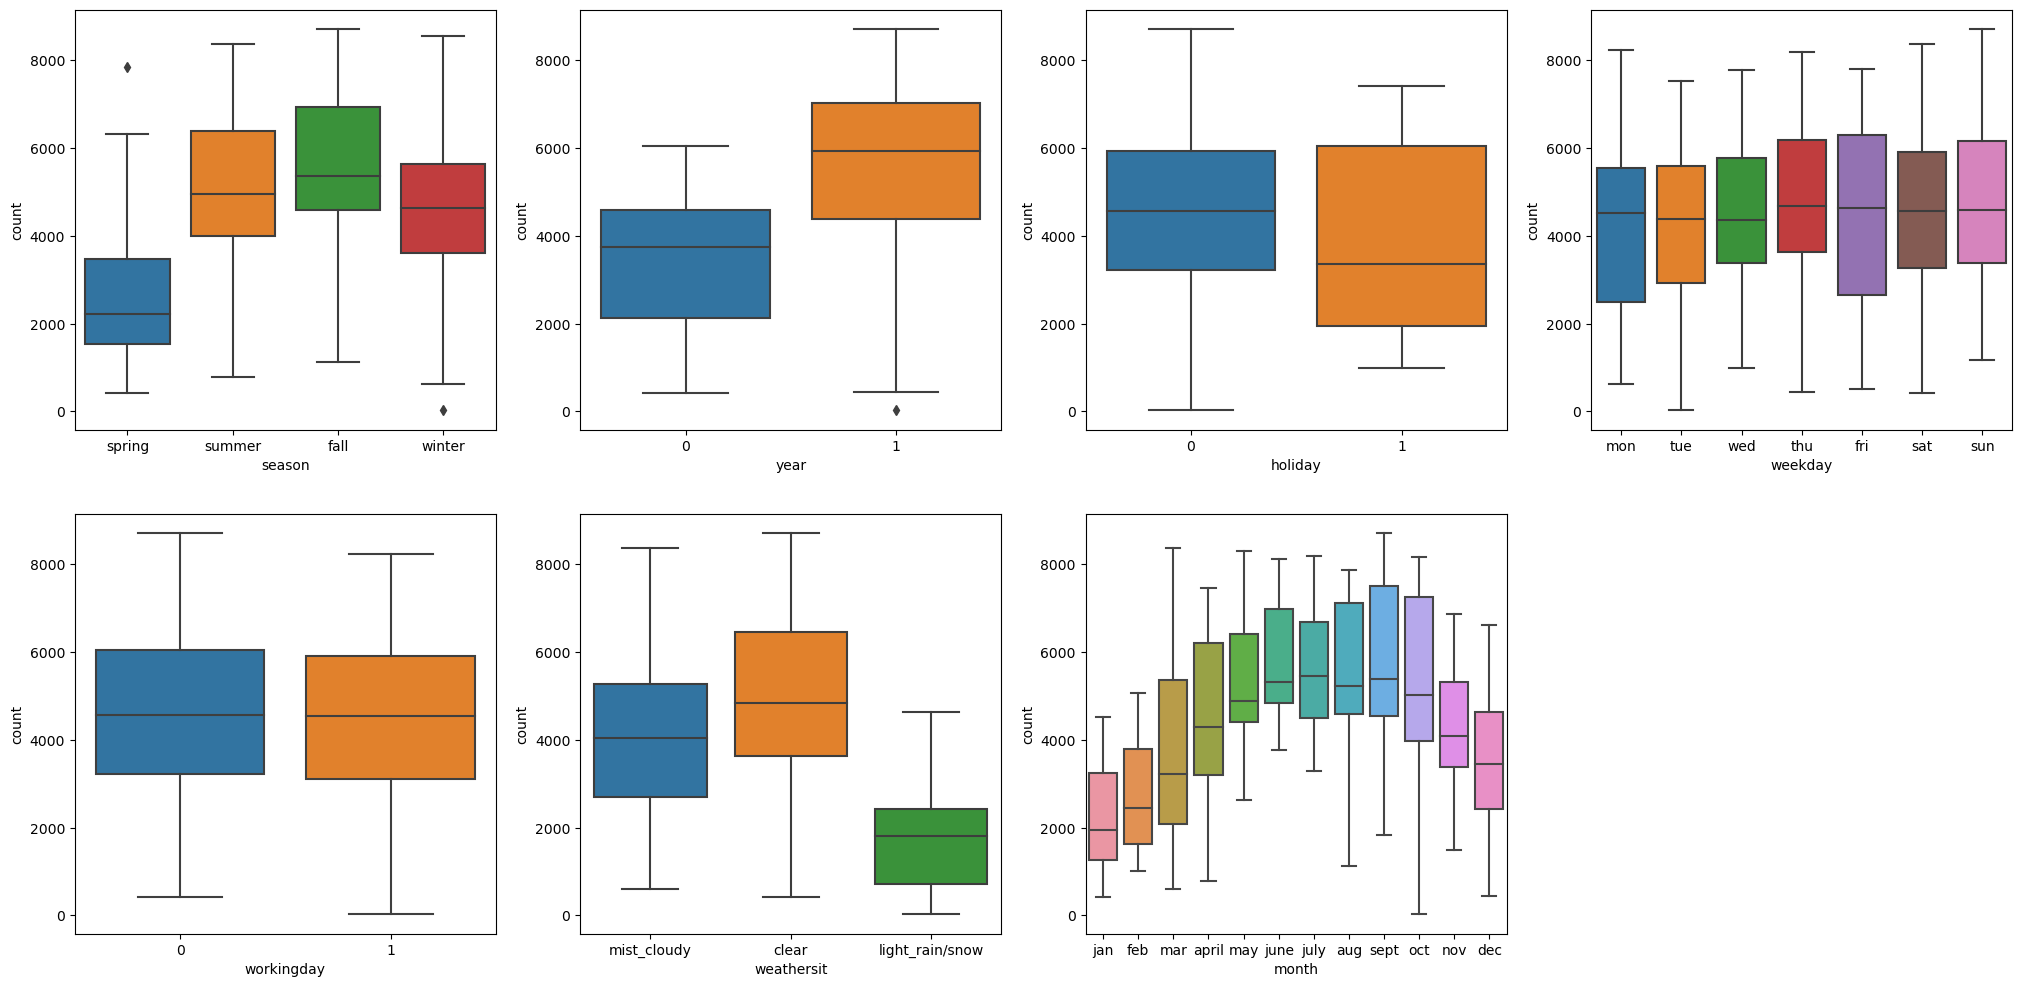

In [17]:
# Visualising Categorical Variables

plt.figure(figsize=(25,12))

plt.subplot(2,4,1)
sns.boxplot(x='season', y='count', data=boombikes)

plt.subplot(2,4,2)
sns.boxplot(x='year', y='count', data=boombikes)

plt.subplot(2,4,3)
sns.boxplot(x='holiday', y='count', data=boombikes)

plt.subplot(2,4,4)
sns.boxplot(x='weekday', y='count', data=boombikes)

plt.subplot(2,4,5)
sns.boxplot(x='workingday', y='count', data=boombikes)

plt.subplot(2,4,6)
sns.boxplot(x='weathersit', y='count', data=boombikes)

plt.subplot(2,4,7)
sns.boxplot(x='month', y='count', data=boombikes)

plt.show()

### Observations:
<pre>

Based on the analysis of the plots, it appears that higher number of bike rentals during the fall season and summer months compared to other seasons. This indicates a seasonal trend in bike rentals, with higher demand during these periods.

Bike Rentals are more in the year 2019 compared to 2018.If the plot shows higher bike rentals in 2019,
it suggests that bike rentals increased from 2018 to 2019.

Bike rentals are more in the month of september and october.
Bike rentals are more likely to occur when the weather is clear.

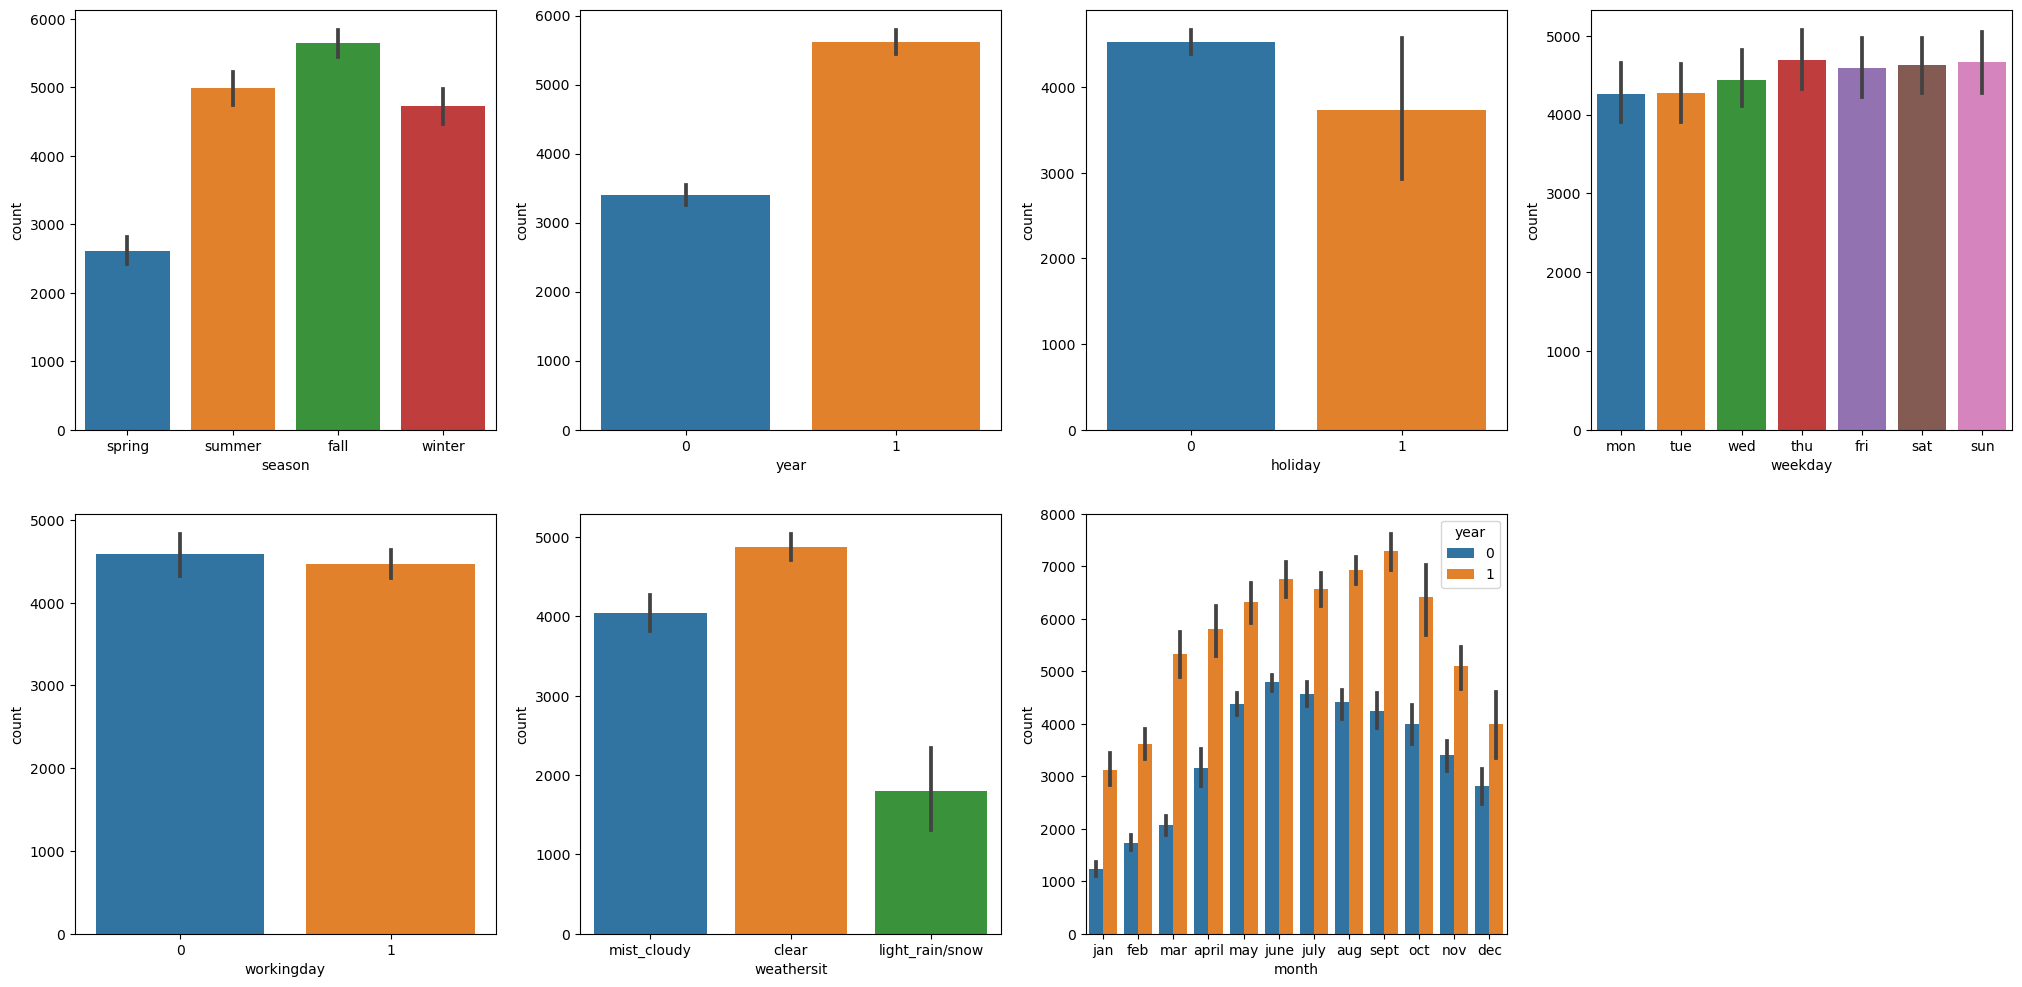

In [18]:
# Lets understand the categorical variables better

plt.figure(figsize=(25,12))

plt.subplot(2,4,1)
sns.barplot(x='season', y='count', data=boombikes)

plt.subplot(2,4,2)
sns.barplot(x='year', y='count', data=boombikes)

plt.subplot(2,4,3)
sns.barplot(x='holiday', y='count', data=boombikes)

plt.subplot(2,4,4)
sns.barplot(x='weekday', y='count', data=boombikes)

plt.subplot(2,4,5)
sns.barplot(x='workingday', y='count', data=boombikes)

plt.subplot(2,4,6)
sns.barplot(x='weathersit', y='count', data=boombikes)

plt.subplot(2,4,7)
sns.barplot(x='month', y='count', hue='year', data=boombikes)

plt.show()

### Observations:
<pre>
Based on the analysis of the plots, it appears that in the year 2019, the fall season particularly during
the months of May, June, July, August, September, and October witnessed a higher number of bike rentals on   clear weather days, specifically on Thursdays, Fridays, Saturdays, and Sundays, regardless of whether it was a working day or a non-working day, excluding holidays.

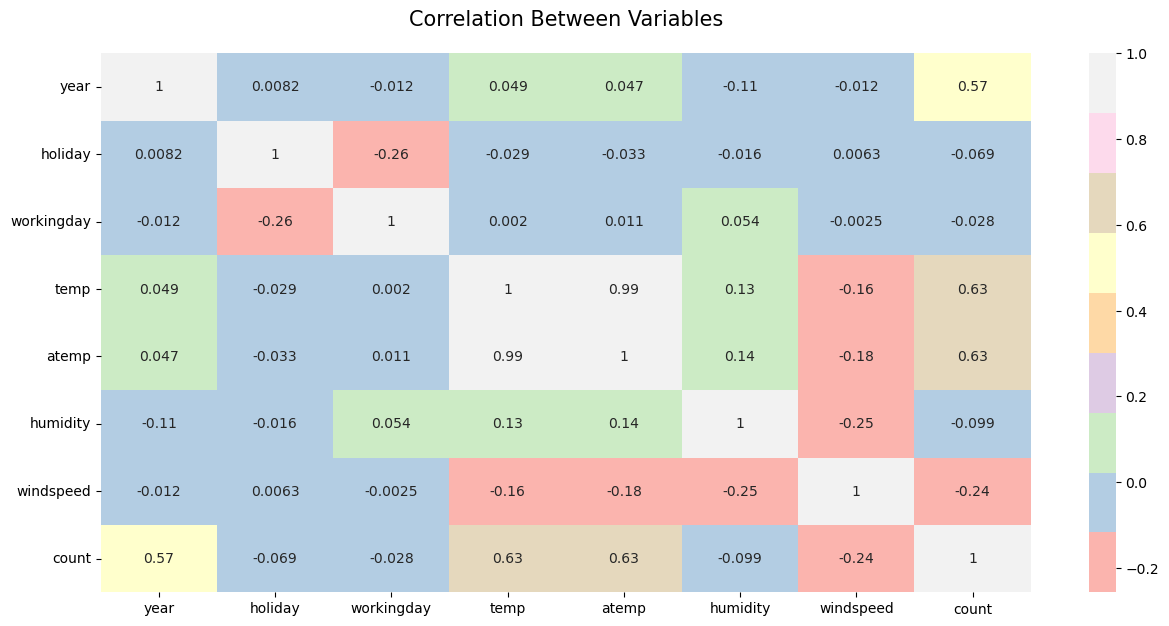

In [19]:
# Check Correlation between variables

plt.figure(figsize=(15,7))
sns.heatmap(boombikes.corr(), cmap='Pastel1', annot=True)
plt.title('Correlation Between Variables', fontsize= 15, pad=20)
plt.show()

### Observation:
<pre>

Based on the analysis of the pairplot and heatmap, it appears that variables such as 'temp', 'atemp',
'casual', 'registered', and 'instant' are correlated with the 'count' variable. 

This correlation suggests that these variables may have a significant impact on the bike rental count.

Considering the correlations observed and the potential identified variables, it is reasonable to consider a Linear Regression Model for predicting the bike rental count. 

### Data Prepration

In [20]:
# Create dummy variables for all the categorical variables

seasons = pd.get_dummies(boombikes['season'],drop_first=True)
months = pd.get_dummies(boombikes['month'],drop_first=True)
weekdays = pd.get_dummies(boombikes['weekday'],drop_first=True)
weathersits = pd.get_dummies(boombikes['weathersit'],drop_first=True)

In [21]:
# Add the results to the original boombikes dataframe

boombikes = pd.concat([boombikes, seasons, months, weekdays, weathersits], axis=1)

# Now let's see the head of our dataframe.

boombikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,oct,sept,mon,sat,sun,thu,tue,wed,light_rain/snow,mist_cloudy
0,spring,0,jan,0,mon,1,mist_cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,jan,0,tue,1,mist_cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Drop 'season', 'month', 'weekday', 'weathersit' as we have created the dummies for it

boombikes.drop(['season', 'month', 'weekday', 'weathersit'], axis=1, inplace=True)

# Check the dataframe

boombikes.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,spring,summer,...,oct,sept,mon,sat,sun,thu,tue,wed,light_rain/snow,mist_cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Check shape of new dataframe

boombikes.shape

(730, 30)

In [24]:
# Check data types of new dataframe

boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   humidity         730 non-null    float64
 6   windspeed        730 non-null    float64
 7   count            730 non-null    int64  
 8   spring           730 non-null    uint8  
 9   summer           730 non-null    uint8  
 10  winter           730 non-null    uint8  
 11  aug              730 non-null    uint8  
 12  dec              730 non-null    uint8  
 13  feb              730 non-null    uint8  
 14  jan              730 non-null    uint8  
 15  july             730 non-null    uint8  
 16  june             730 non-null    uint8  
 17  mar             

### Splitting the Data into Training and Testing Sets

In [25]:
# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)

df_train, df_test = train_test_split(boombikes, train_size = 0.7, random_state = 100)

In [26]:
# Check shape of the data after split

print('df_train:',df_train.shape)
print('df_test:',df_test.shape)

df_train: (510, 30)
df_test: (220, 30)


### Rescaling the features

In [27]:
scaler = MinMaxScaler()

In [28]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'count']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

# Check updated train set

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,spring,summer,...,oct,sept,mon,sat,sun,thu,tue,wed,light_rain/snow,mist_cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,1


In [29]:
# Check statistical summary of train set

df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,spring,summer,...,oct,sept,mon,sat,sun,thu,tue,wed,light_rain/snow,mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Observation:
<pre>
All the variables are now between 0 and 1

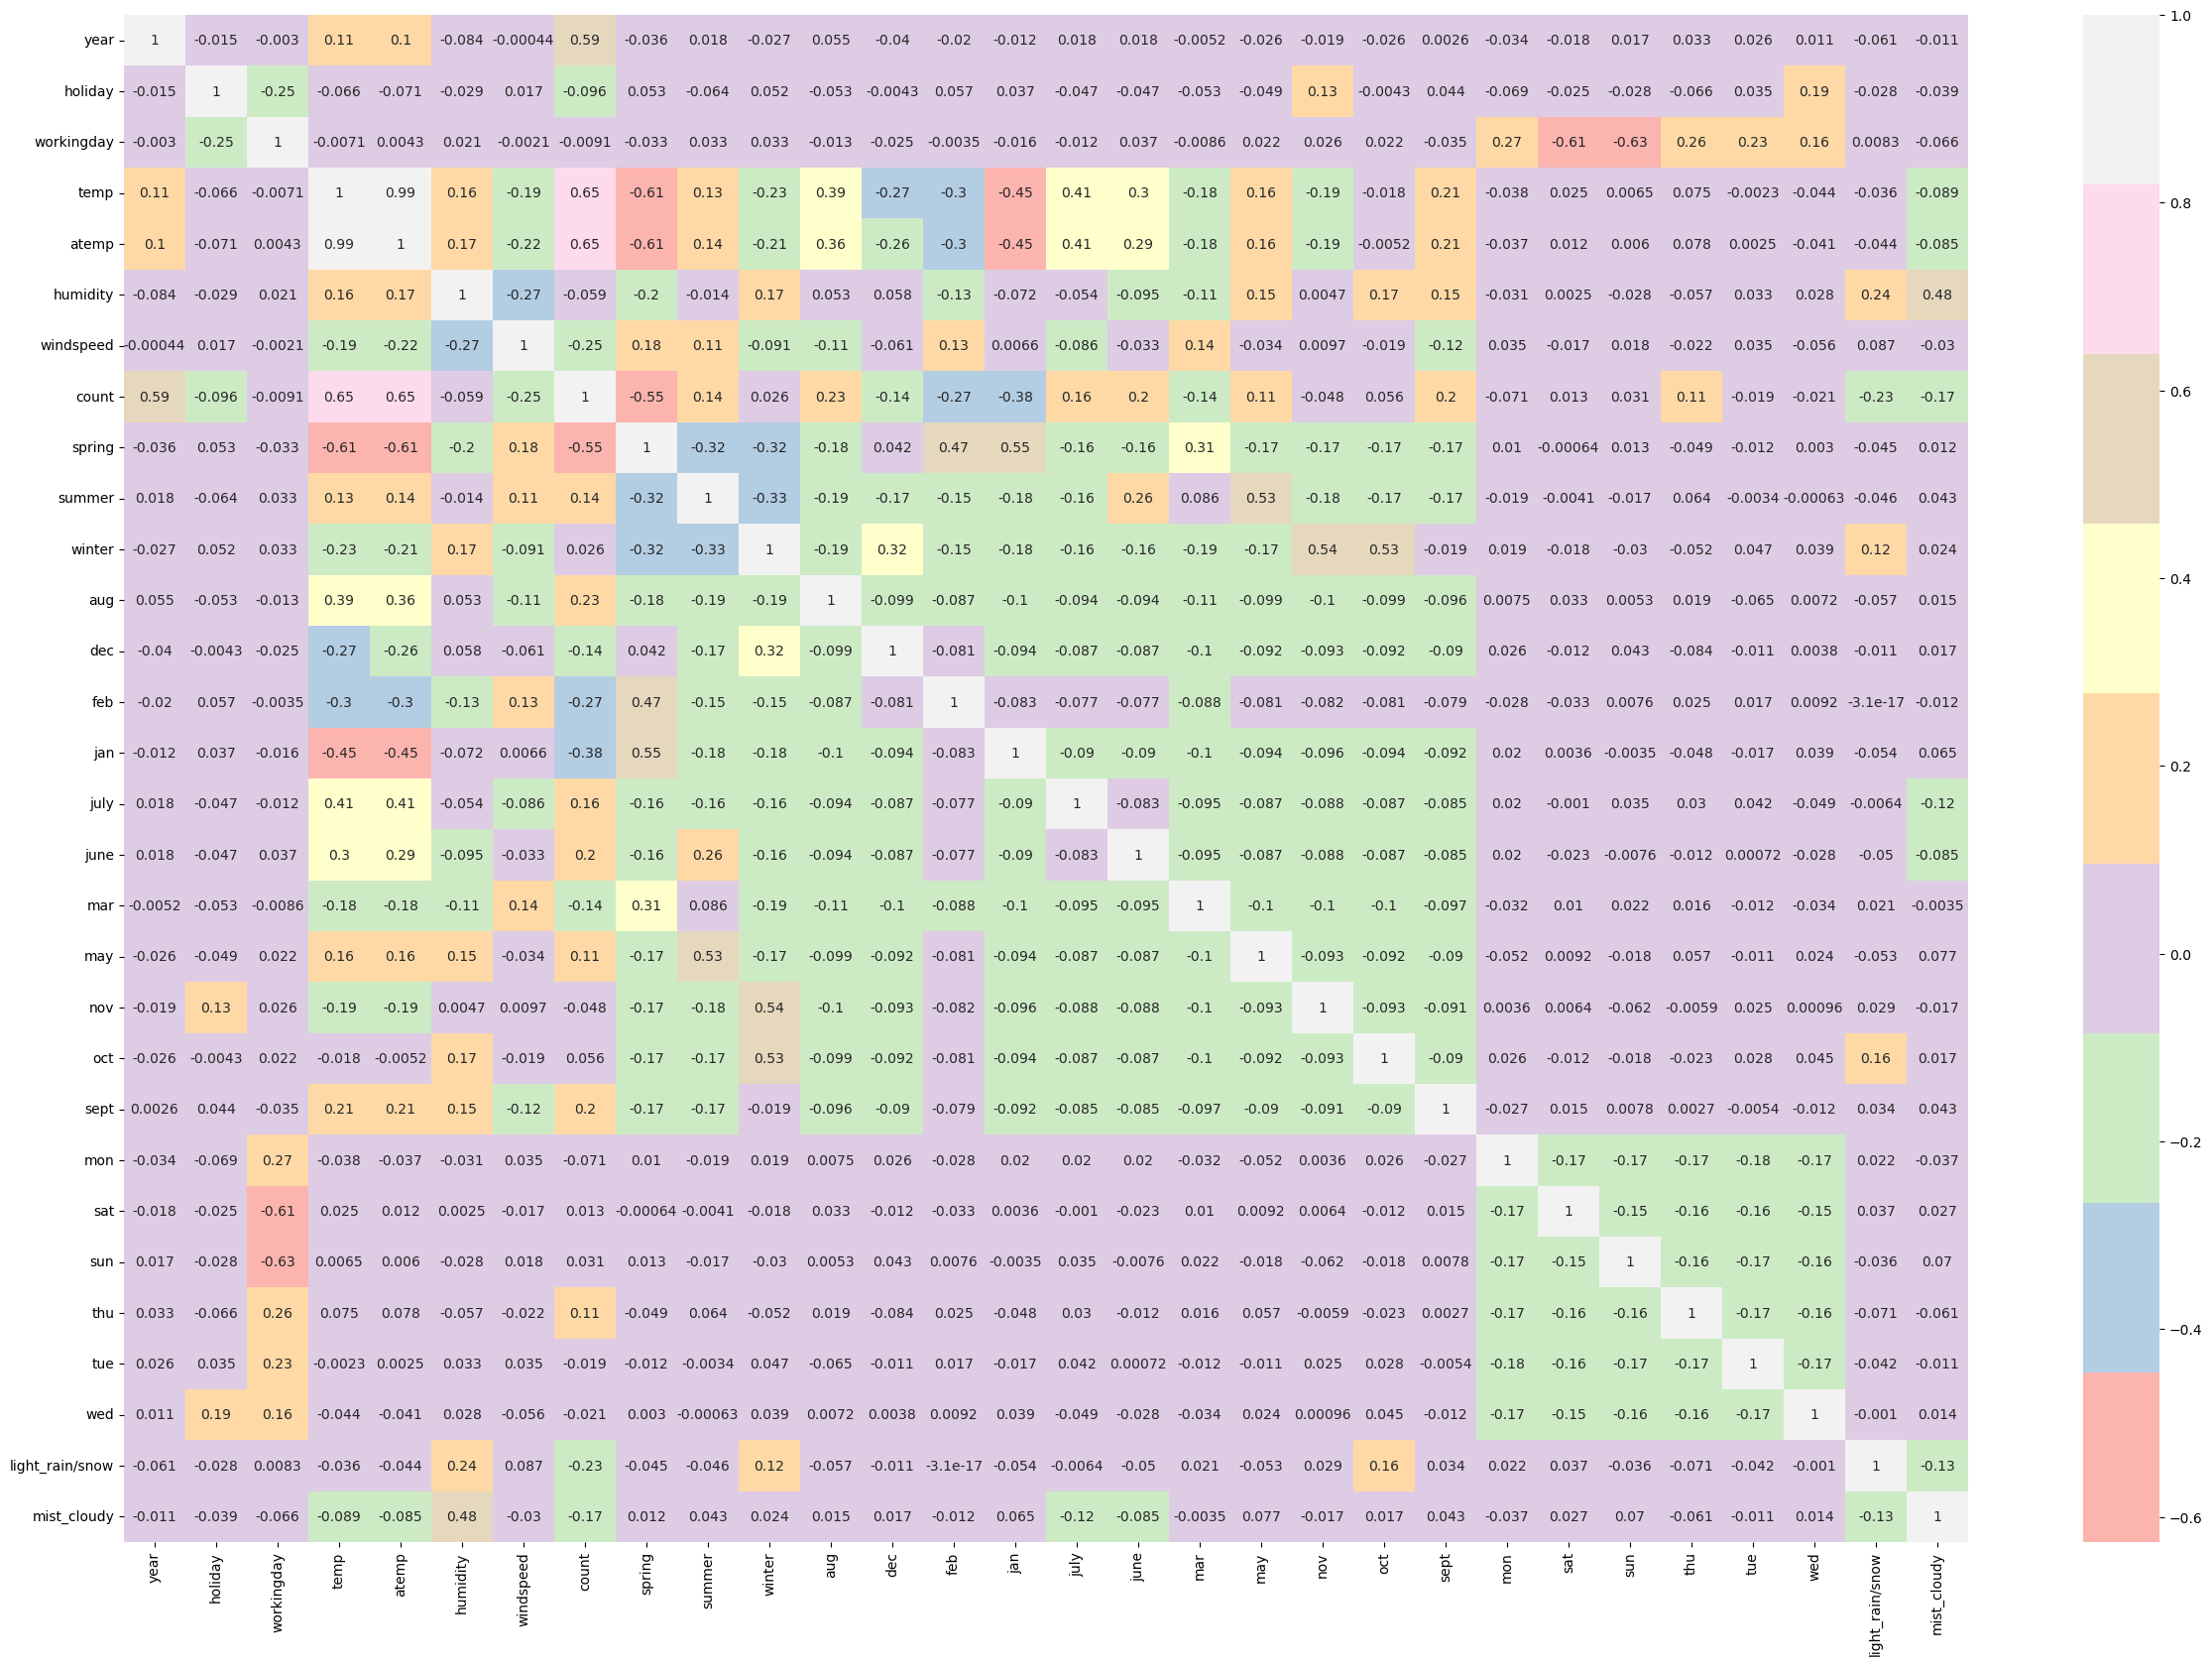

In [30]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="Pastel1")
plt.show()

### Observation:
<pre>

Based on the heatmap analysis, the 'temp' and 'year' variables are correlated with the 'count' variable.

The correlation between 'temp' and 'count' suggests that temperature has an influence on bike rental demand.
This finding aligns with the common understanding that people are more likely to rent bikes when the weather is favorable or comfortable.

### Dividing into X and Y sets for the model building

In [31]:
y_train = df_train.pop('count')
X_train = df_train

### Building a Linear Regression Model using mixed approach

In [32]:
# Running RFE with the output number of the variable equal to 15

rfe = RFE(estimator = LinearRegression(), n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [33]:
# List of selected variables 

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 15),
 ('may', False, 9),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sept', True, 1),
 ('mon', False, 8),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thu', False, 14),
 ('tue', False, 7),
 ('wed', False, 11),
 ('light_rain/snow', True, 1),
 ('mist_cloudy', True, 1)]

In [34]:
# Columns where RFE support is True

col = X_train.columns[rfe.support_]

# Check columns

col

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'jan', 'july', 'nov', 'sept', 'light_rain/snow',
       'mist_cloudy'],
      dtype='object')

In [35]:
# Columns where RFE support is False

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [36]:
# Creating train dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [37]:
# Adding a constant variable

X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model

lm = sm.OLS(y_train,X_train_rfe).fit()

# Check the summary of linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          8.15e-189
Time:                        13:00:18   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3197      0.036     

In [38]:
# Checking VIF

#Drop the constant term B0

X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [39]:
# Create function to calculate VIF.

def vif_calculation(boombikes):
  vif = pd.DataFrame()
  vif['Features'] = boombikes.columns
  vif['VIF'] = [variance_inflation_factor(boombikes.values, i) for i in range(boombikes.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  return vif

In [40]:
# Calculate VIF for new model.

vif_calculation(X_train_rfe)

,Features,VIF
3,humidity,30.89
2,temp,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
14,mist_cloudy,2.32
0,year,2.09
11,nov,1.85
9,jan,1.75


### Observation:
<pre>
Humidity is insignificant in presence of other variables due to high VIF; can be dropped

In [41]:
# Drop Humidity

X_train_new1 = X_train_rfe.drop(['humidity'], axis = 1)

In [42]:
# Rebuilding model without Humidity

X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          4.75e-186
Time:                        13:00:19   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2450      0.032     

In [43]:
# Drop constant term B0

X_train_lm1 = X_train_lm1.drop(['const'], axis = 1)

In [44]:
# Calculate VIF for new model

vif_calculation(X_train_lm1)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.95
4,spring,2.89
5,summer,2.24
0,year,2.07
10,nov,1.81
8,jan,1.66
9,july,1.59
13,mist_cloudy,1.57


### Observation:
<pre>
November month is insignificant in presence of other variables due to high p-value; can be dropped

In [45]:
# Drop November

X_train_new2 = X_train_lm1.drop(['nov'], axis = 1)

In [46]:
# Rebuilding model without November

X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          2.74e-186
Time:                        13:00:19   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2283      0.031     

In [47]:
# Drop constant term B0

X_train_lm2 = X_train_lm2.drop(['const'], axis = 1)

In [48]:
# Calculate VIF for new model

vif_calculation(X_train_lm2)

,Features,VIF
2,temp,5.14
3,windspeed,4.62
4,spring,2.89
5,summer,2.24
0,year,2.07
6,winter,2.05
8,jan,1.65
9,july,1.59
12,mist_cloudy,1.57
10,sept,1.34


### Observation:
<pre>
December month is insignificant in presence of other variables due to high p-value; can be dropped

In [49]:
# Drop December

X_train_new3 = X_train_lm2.drop(['dec'], axis = 1)

In [50]:
# Rebuilding model without December

X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          8.14e-187
Time:                        13:00:19   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2154      0.030     

In [51]:
# Drop constant term B0

X_train_lm3 = X_train_lm3.drop(['const'], axis = 1)

In [52]:
# Calculate VIF for new model

vif_calculation(X_train_lm3)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
4,spring,2.75
5,summer,2.24
0,year,2.07
6,winter,1.78
7,jan,1.61
8,july,1.59
11,mist_cloudy,1.56
9,sept,1.34


### Observation:
<pre>
January month is insignificant in presence of other variables due to high p-value; can be dropped

In [53]:
# Drop January

X_train_new4 = X_train_lm3.drop(['jan'], axis = 1)

In [54]:
# Rebuilding model without January

X_train_lm4 = sm.add_constant(X_train_new4)
lm4 = sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          5.06e-187
Time:                        13:00:19   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1994      0.030     

In [55]:
# Drop constant term B0

X_train_lm4 = X_train_lm4.drop(['const'], axis = 1)

In [56]:
# Calculate VIF for new model

vif_calculation(X_train_lm4)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.23
4,spring,2.08
0,year,2.07
6,winter,1.78
7,july,1.58
10,mist_cloudy,1.55
8,sept,1.34
9,light_rain/snow,1.08


### Observation:
<pre>
July month is insignificant in presence of other variables due to high p-value; can be dropped

In [57]:
# Drop July

X_train_new5 = X_train_lm4.drop(['july'], axis = 1)

In [58]:
# Rebuilding model without July

X_train_lm5 = sm.add_constant(X_train_new5)
lm5 = sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          1.47e-186
Time:                        13:00:19   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1909      0.030     

In [59]:
# Drop constant term B0

X_train_lm5 = X_train_lm5.drop(['const'], axis = 1)

In [60]:
# Calculate VIF for new model

vif_calculation(X_train_lm5)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
4,spring,1.99
5,summer,1.90
6,winter,1.63
9,mist_cloudy,1.55
7,sept,1.23
8,light_rain/snow,1.08
1,holiday,1.04


### Observations:
<pre>

Now as you can see, the VIFs and p-values both are within an acceptable range. 

The R-squared value is 0.833, which means that approximately 83% of the variability in the dependent
variable can be explained by the independent variable(s) included in the model. A higher R-squared value    indicates a better fit of the model to the data.

The adjusted R-squared value is 0.829, which is slightly lower than the R-squared value. It suggests that
the independent variables in the model are still good predictors of the dependent variable, even after      considering the number of variables and the sample size.

The F-statistic is 248.9. The larger the F-statistic, the more significant the relationship is between the  independent and dependent variables.

The p-value is very small (1.47e-186), which is essentially zero. This indicates strong evidence to reject
the null hypothesis and suggests that there is a significant relationship between the independent and 
dependent variables.

So we go ahead and make our predictions using this model only.


### Residual Analysis of the Train Data

In [61]:
# Add constant

X_train_lm5 = sm.add_constant(X_train_new5)

lm5 = sm.OLS(y_train,X_train_lm5).fit()

# Check the final DataFrame

X_train_lm5

,const,year,holiday,temp,windspeed,spring,summer,winter,sept,light_rain/snow,mist_cloudy
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,1
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0,0,1
111,1.0,0,0,0.345824,0.380981,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,0,1,0,0,0,1


In [62]:
# Making Prediction

y_train_pred = lm5.predict(X_train_lm5)

### Normality of Residuals

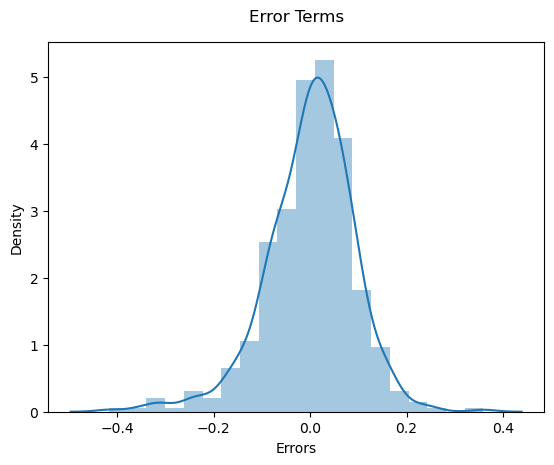

In [63]:
# Plot the histogram of the error terms

sns.distplot((y_train - y_train_pred), bins = 20)

plt.title('Error Terms', fontsize = 12, pad=15)
plt.xlabel('Errors', fontsize = 10)

plt.show()

### Observation:
<pre>
Based on the analysis of distplot, we can see errors are normally distributed

### Linear Relationship

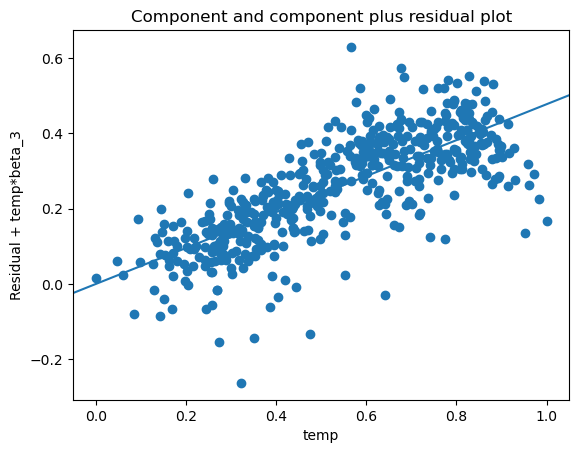

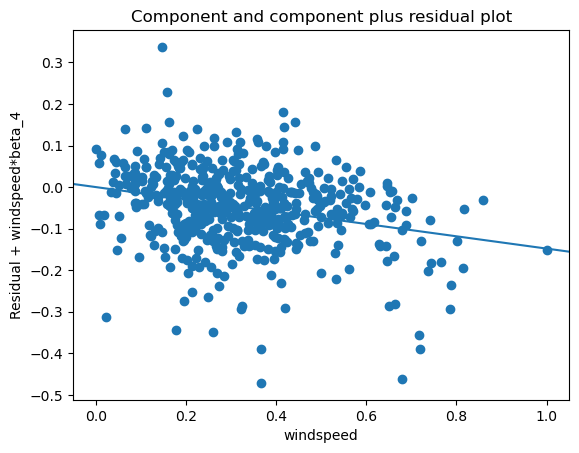

In [64]:
# Check Linear Relationship

sm.graphics.plot_ccpr(lm5, 'temp')

sm.graphics.plot_ccpr(lm5, 'windspeed')

plt.show()

### Observation:
<pre>
Based on the analysis of CCPR plots, we can observe Linearity.

### Homoscedasticity

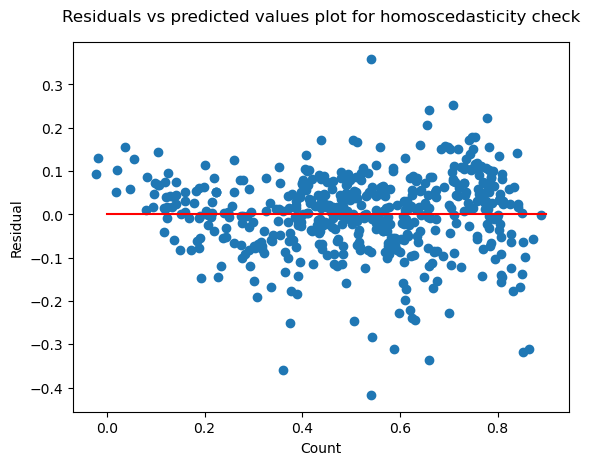

In [65]:
# Check Homoscedasticity

residual = y_train - y_train_pred

plt.scatter(y_train_pred,residual)
sns.lineplot(x=[0,0.9],y=[0,0],color='red')

plt.title('Residuals vs predicted values plot for homoscedasticity check', pad = 15)
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

### Observation:
<pre>
Based on the analysis of scatter plot, The spread of the residuals appears roughly constant across different ranges of the predicted values which indicates homoscedasticity.

### Multicollinearity

In [66]:
# Drop constant term B0

X_train_lm5 = X_train_lm5.drop(['const'], axis = 1)

# Calculate VIF for final model

vif_calculation(X_train_lm5)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
4,spring,1.99
5,summer,1.90
6,winter,1.63
9,mist_cloudy,1.55
7,sept,1.23
8,light_rain/snow,1.08
1,holiday,1.04


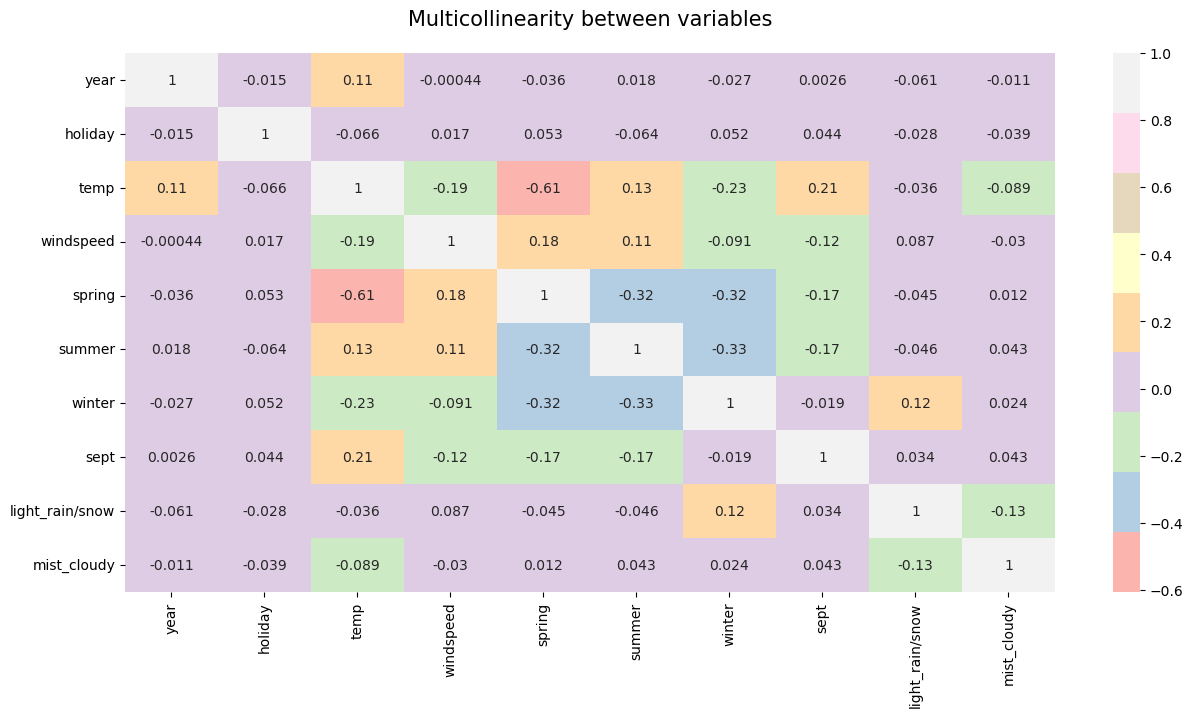

In [67]:
# Check Multicollinearity between variables

plt.figure(figsize=(15,7))
sns.heatmap(X_train_lm5.corr(), cmap='Pastel1', annot=True)
plt.title('Multicollinearity between variables', fontsize= 15, pad=20)
plt.show()

### Observation:
<pre>
Based on the heatmap analysis, VIF values are less than 5 which is good and also there is no
multicolinearity.

### No Autocorrelation

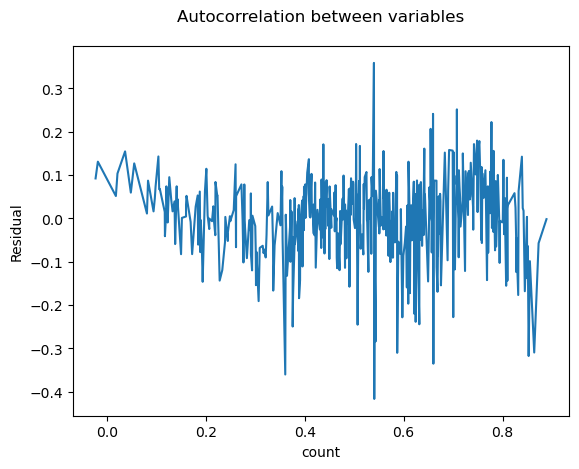

In [68]:
# Check for Auto Correlation

sns.lineplot(x=y_train_pred, y=residual, data=X_train_lm5)
plt.title('Autocorrelation between variables', fontsize= 12, pad=18)
plt.xlabel('count')
plt.ylabel('Residual')
plt.show()

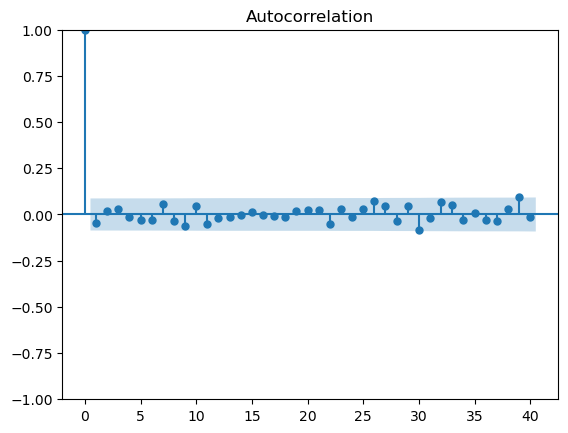

In [69]:
# Autocorrelation

sm.graphics.tsa.plot_acf(residual, lags=40)
plt.show()

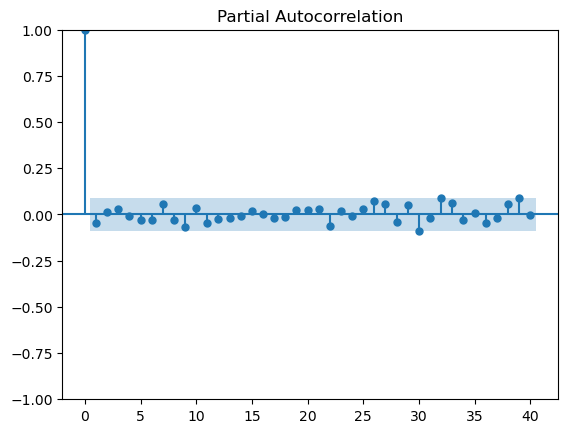

In [70]:
# Partial autocorrelation

sm.graphics.tsa.plot_pacf(residual, lags=40)
plt.show()

### Observation:
<pre>
Based on the analysis of lineplot and the autocorrelation function (ACF), there is no positive 
autocorrelation as well as Durbin-Watson value of final model lm5 is 2.085, which signifies there is no     autocorrelation.

### Making Predictions

In [71]:
# Apply scaler() to all the numeric variables

num_vars=['temp','atemp','humidity','windspeed','count']

#Fit on data

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,spring,summer,...,oct,sept,mon,sat,sun,thu,tue,wed,light_rain/snow,mist_cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


### Dividing into X and Y sets for the model building

In [72]:
y_test = df_test.pop('count')
X_test = df_test

In [73]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new5.columns]

# Adding a constant variable
X_test_new1 = sm.add_constant(X_test_new)

X_test_new1.head()

,const,year,holiday,temp,windspeed,spring,summer,winter,sept,light_rain/snow,mist_cloudy
184,1.0,0,1,0.831783,0.084219,0,0,0,0,0,1
535,1.0,1,0,0.901354,0.153728,0,1,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,0,1,0,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,1,0,0,0,0


In [74]:
# Making prediction

y_pred = lm5.predict(X_test_new1)

#### Finding R-squared and Adjusted R-Squared for Test set

In [80]:
# Calculating R^2 value for the test dataset

r2 = r2_score(y_test,y_pred)
r2

0.8038195990728844

In [76]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = 1-(1-r2)*(X_test_new.shape[0]-1)/(X_test_new.shape[0]-X_test_new.shape[1]-1)
print(adjusted_r2)

0.7944329770189553


### Model Evaluation

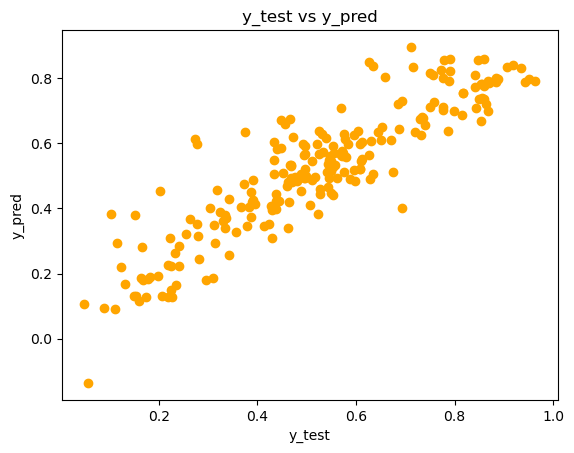

In [77]:
# Plotting y_test and y_pred to understand the spread.

plt.scatter(y_test,y_pred,color='orange')

plt.title('y_test vs y_pred', fontsize=12)
plt.xlabel('y_test')
plt.ylabel('y_pred')

plt.show()

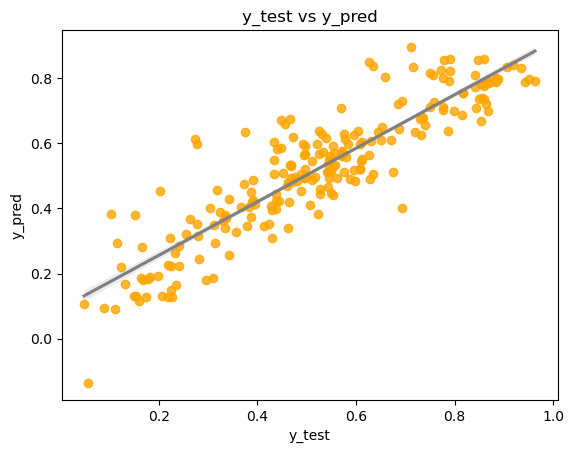

In [78]:
# Regression plot

sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True, scatter_kws={"color": "orange"}, line_kws={"color": "grey"})

plt.title('y_test vs y_pred', fontsize=12)
plt.xlabel('y_test')
plt.ylabel('y_pred')

plt.show()

In [79]:
round(lm5.params,4)

const              0.1909
year               0.2341
holiday           -0.0963
temp               0.4777
windspeed         -0.1481
spring            -0.0554
summer             0.0621
winter             0.0945
sept               0.0910
light_rain/snow   -0.2850
mist_cloudy       -0.0787
dtype: float64

### Observation:
<pre>
We can see that the equation of our best fitted line is:

count = 0.1909 + 0.2341 * year - 0.0963 * holiday + 0.4777 * temp - 0.1481 * windspeed - 0.0554 * spring
        + 0.0621 * summer + 0.0945 * winter + 0.0910 * sept - 0.2850 light_rain/snow - 0.0787 * mist_cloudy

## Comparison between Train Dataset and Test Datset
<pre>

* Train R-squared: 0.833
* Train Adj. R-squared: 0.829

* Test R-squared: 0.803
* Test Adj. R-squared: 0.794

* Difference in R-squared between Train and Test is 3%
* Difference in Adj. R-squared between Train and Test is 3.5%